# 7장 - 수학을 기계학습에 응용

이 장에서는 여기까지 배운 수학을 인공지능의 일종인 기계학습에 응용합니다.  
기계학습에서 다루는 문제는 크게 회귀와 분류로 나눌 수 있는데 각각의 예를 처음에 하나씩 설명합니다. 그 후, 기계학습의 일종, 뉴럴 네트워크의 개요를 배우고 나서 단일 뉴런에 학습을 시킵니다. 최소한의 구현으로 기계학습을 시행, 수학을 어떻게 기계학습에 활용할 것인지를 조금씩 배웁니다.

## 7.1 회귀와 과학습

비교적 간단한 기계학습인 회귀 분석을 사용해서 데이터의 경향을 학습합니다.

### 회귀와 분류

데이터의 경향을 $Y = f(X)$ 모델(정량적인 룰을 수식 등으로 나타낸 것)로 파악하는 경우를 생각합시다. 이 경우 $X$와 $Y$는 $Y  = \{y_1, y_2, ···, y_m\}, X = \{x_1, x_2, ···, x_n\}$처럼 각각 $m$ 개, $n$ 개의 값으로 이뤄집니다.  
이 때 $Y$의 각 값이 연속값이면 **회귀**, $Y$의 각 값이 0, 1 등의 이산적인 값이면 **분류**라고 합니다. 기계학습에서 다룰 문제는 크게 이 「회귀」와 「분류」로 나눌 수 있습니다.

### 회귀 분석과 다항식 회귀

회귀에 의한 분석을 실시하는 것을 **회귀 분석**이라고 합니다. 회귀 분석은 모델이 데이터의 경향을 학습하기 위한 기계학습의 일종이라고 생각할 수 있습니다. 가장 간단한 회귀 분석은 직선의 식 $y = ax ＋ b$를 데이터에 적용합니다.  
여기에서는 다항식을 데이터에 적용하는 **다항식 회귀**를 사용해서 기계학습을 실시합니다. 이전 장에서 설명했는데 $n$차의 다항식은 다음과 같이 총합의 형태로 나타낼 수 있습니다.

$$ f(x) = \sum_{k=1}^n a_kx^k ··· (식1)$$

이 경우, $a_0, a_1, ···, a_n$이 함수의 파라미터가 됩니다.  
이 식을 데이터에 적용시킴으로써 데이터의 특징을 파악해 미지의 값 예측을 할 수 있습니다.

### 최소제곱법

**최소제곱법**은 다음에 나타내는 제곱합 $J$를 최소로 하는 함수 $f(x)$의 파라미터를 구하는 것입니다.  

$$ J = \sum_{j=1}^m \left( f(x_j) － t_j \right) ^2 $$

여기에서 $t_j$는 각 데이터를 나타냅니다. 이처럼 함수의 출력과 각 데이터의 차를 제곱하고 총합을 취함으로써 제곱합을 구합니다.  
기계학습에서는 이것에 $\frac{1}{2}$을 곱해서 오차로 하는 다음의 오차제곱합이 자주 사용됩니다.  

$$ E = \frac{1}{2} \sum_{j=1}^m \left( f(x_j) － t_j \right) ^2 ··· (식2)$$

$\frac{1}{2}$을 곱하는 것은 미분할 때에 다루기 쉽게 하기 위함입니다.  
이 오차를 최소가 되도록 함수의 파라미터를 조정하는 것은 함수가 데이터의 경향을 나타내도록 학습하는 것을 의미합니다.

### 최급강하법을 이용해서 오차를 최소로 한다

**(식1)** 에 표시된 다항실을 이용한 다항식 회귀의 경우, **(식2)** 의 오차제곱합을 최소로 하도록 각 파라미터를 조정합니다.  
**(식1)** 을 **(식2)** 에 대입하면 다음과 같이 됩니다.  

$$ E = \frac{1}{2} \sum_{j=1}^m \left( \sum_{k=0}^n a_k x_j^k － t_j \right) ^2 ··· (식3)$$

여기에서는 이 오차를 최소화하기 위해서 이전의 장에서 설명한 최급강하법을 사용합니다.  
위 식의 $E$를 최소화하는 경우, 최급강하법은 다음의 식으로 표현됩니다. $0 \leqq i \leqq n$으로 합니다.  

$$ a_i \leftarrow  a_i － \eta \frac{\partial E}{\partial a_i} ···(식4)$$

파라미터 $a_0, a_1, ···, a_n$을 위에 적은 식으로 갱신하는 것인데 그러기 위해서는 오차 $E$의 $a_i$에 의한 편미분 $\frac{\partial E}{\partial a_i}$를 구해야 합니다.  
$\frac{\partial E}{\partial a_i}$는 다음과 같이 연쇄율을 이용해서 구할 수 있습니다.  
먼저 다음과 같이 $u_j$를 설정합니다.  

$$ u_j = \sum_{k=0}^n a_k x_j^k － t_j ···(식5)$$

이 때, $E$는 다음과 같이 나타냅니다.

$$ E = \frac{1}{2} \sum_{j=1}^m u_j^2 $$

따라서 $E$는 $a_i$로 편미분하는데, 연쇄율을 이용해서 다음과 같이 전개할 수 있습니다.  

$$ \frac{\partial E}{\partial a_i} = \frac{1}{2} \sum_{j=1}^m \frac{\partial u_j^2}{\partial u_j} \frac{\partial u_j}{\partial a_i} ···(식6)$$

여기서 $\Sigma$의 내용은 각각 다음과 같이 구할 수 있습니다.

$$ \frac{\partial u_j^2}{\partial u_j} = 2u_j $$
$$ \\ $$
$$ \frac{\partial u_J}{\partial a_i} = x_j^i $$

위에 적은 것은 **(식5)** 의 편미분에 의해 구했습니다.  
이상으로부터 **(식6)** 은 다음의 형태가 됩니다.

$$ \frac{\partial E}{\partial a_i} = \frac{1}{2} \sum_{j=1}^m 2u_jx_j^i $$
$$ \\ $$
$$ = \sum_{j=1}^m u_jx_j^i $$
$$ \\ $$
$$ = \sum_{j=1}^m \left( \sum_{k=0}^n a_kx_j^k － t_j \right) x_j^i $$
$$ \\ $$
$$ = \sum_{j=1}^m \left( f(x_j) － t_j \right) x_j^i  ···(식7)$$

이 식과 **(식4)** 를 사용해서 각 파라미터 $a_i$를 몇 번이나 갱신함으로써 오차제곱합 $E$는 점차 작아집니다.  
이상과 같은 오차 파라미터에 의한 편미분은 **기울기** (경사, 그라디언트, 구배)라고 부릅니다. 특히 최근 주목을 끌고 있는 딥러닝에서는 기울기를 구하는 방법이 알고리즘의 핵심이 됩니다.

### 사용하는 데이터

이 절에서 다항식 회귀에 사용하는 데이터는 **sin()** 함수에 노이즈를 더한 것으로 아래의 코드에서 생성됩니다. NumPy의 **random.randn()** 함수는 인수의 수만큼 정규분포를 따르는 난수를 반환합니다. 여기서는 이것에 0.4를 곱해서 노이즈로 합니다.  
또한, 파라미터를 수혐하기 쉽게 하기 위해서 입력 $X$는 －1에서 1의 범위에 들어가게 합니다.

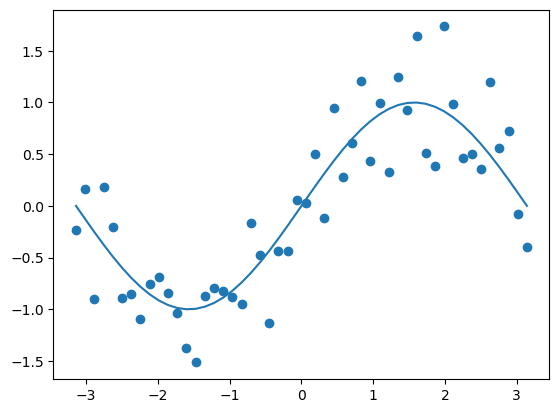

In [10]:
#리스트7.1

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-np.pi, np.pi) # 입력
T = np.sin(X) # 데이터
plt.plot(X, T) # 노이즈의 추가 전

T += 0.4 * np.random.randn(len(X)) # 정규분포를 따른 노이즈를 추가
plt.scatter(X, T) # 노이즈 추가 후

plt.show()

X /= np.pi # 수렴하기 쉽게 X의 범위를 -1부터 1 사이로 수렴한다

**sin()** 함수를 베이스로 하고 있는데 어느 정도 랜덤으로 흩어져 있는 데이터가 생성됐습니다. 이러한 데이터의 경향을 다항식 회귀에 의해 파악합니다.

### 다항식 회귀의 구현

아래의 코드에서 다항식 회귀를 구현합니다. 최급강하법에 의해 오차제곱합이 작아지도록 각 계수를 조정합니다. 각 파라미터에는 초깃값을 설정해야 하는데 입력 $X$의 각 값이 －1과 1사이에 있기 때문에 고차의 항일수록 큰 초깃값이 필요합니다.  
1차, 3차, 6차 각각의 다항식에서 다항식 회귀를 실시, 결과를 표시합니다.

--- 1차 다항식 ---


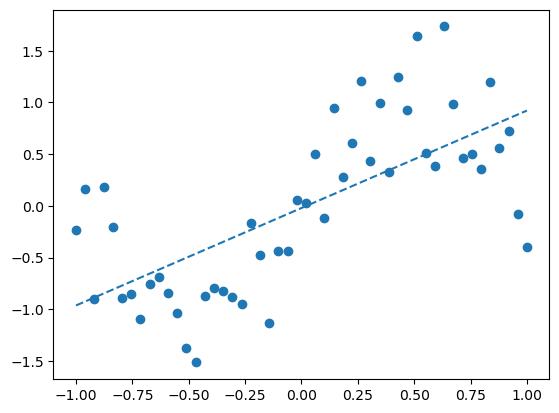

--- 3차 다항식 ---


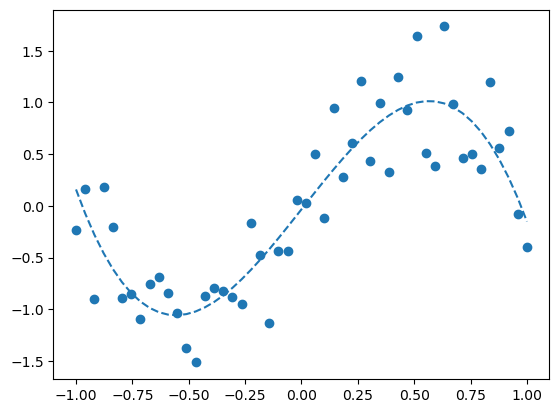

--- 6차 다항식 ---


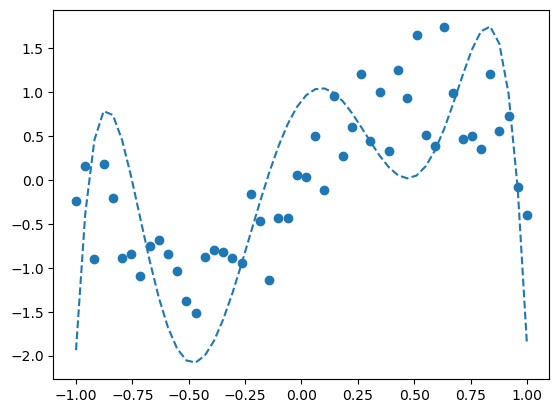

In [11]:
#리스트7.2

eta = 0.01 # 학습계수

# --- 다항식 ---
def polynomial(x, params):
    poly = 0
    for i in range(len(params)):
        poly += params[i]*x**i # (식1)
    return poly

# --- 각 파라미터의 기울기 ---
def grad_params(X, T, params):
    grad_ps = np.zeros(len(params))
    for i in range(len(params)):
        for j in range(len(X)):
            grad_ps[i] += (polynomial(X[j], params) - T[j])*X[j]**i # (식7)
    return grad_ps

# --- 학습 ----
def fit(X, T, degree, epoch):
# degree: 다항식의 차수, spoch: 반복하는 횟수
     
    # --- 파라미터의 초깃값을 설정 ---
    params = np.random.randn(degree+1) # 파라미터의 초깃값
    for i in range(len(params)):
        params[i] *= 2**i
        # 고차의 항일수록 파라미터의 초깃값을 크게 한다
    
    # --- 파라미터의 갱신 ---
    for i in range(epoch):
        params -= eta * grad_params(X, T, params) # (식4)
    
    return params

# --- 결과 표시 ---
degrees = [1, 3, 6] # 다항식의 차수
for degree in degrees:
    print("--- " + str(degree) + "차 다항식 ---")
    # str로 문자열 변환
    params = fit(X, T, degree, 1000)
    Y = polynomial(X, params) # 학습 후의 파라미터를 사용힌 디항식
    plt.scatter(X, T)
    plt.plot(X, Y, linestyle="dashed")
    plt.show()

1차 다항식의 경우 함수의 형상은 직선이 됩니다. 이 경우 데이터의 경향은 매우 대략적으로밖에 파악할 수 없습니다. 3차 다항식의 경우 함수의 형상이 **sin()** 함수와 가까워지고, 데이터 경향을 잘 파악하고 있습니다. 6차 다항식의 경우 함수의 형상이 너무 복잡해서 데이터 경향을 제대로 파악하고 있지 않습니다.  

이상과 같이, 차수가 너무 크거나 작아도 데이터의 경향을 제대로 파악할 수 없습니다. 특히 위에 적은 6차 다항식의 케이스처럼 모델이 너무 복잡한 이유 등으로 데이터에 과잉으로 피팅하는 것을 **과학습** 이라고 합니다. 과학습은 모델이 데이터에 과잉으로 적합한 나머지 데이터의 본질을 훼손한 상태라고 생각할 수 있습니다.  

이러한 과학습이 발생하면 모델의 미지의 데이터를 예측하는 성능이 저하되기 때문에 과학습은 기계학습 전반에서 피해야 할 문제입니다.

## 7.2 분류와 로지스틱 회귀

기계학습의 일종인 로지스틱 회귀에 의한 데이터의 분류를 실시합니다.

### 분류

이전 절에서 조금 접했는데 0, 1 등의 이산적인 값을 출력으로 하는 기계학습의 모델을 사용하여 데이터의 경향을 파악하는 것을 **분류**라고 합니다. 즉, 분류는 기계학습의 모델에 의해 입력을 그룹으로 나누는 걸 의미합니다.  
예를 들어 꽃의 품종 분류나 문자 인식 등 이산적으로 입력을 그룹으로 나누는 기계학습의 태스크는 분류로 간주할 수 있습니다.

### 로지스틱 회귀

로지스틱 회귀에서는 입력을 0이나 1의 2값으로 분류합니다. 로지스틱 회귀에서 분류에 사용하는 식은 다음과 같습니다.

$$ y = \frac{1}{1 ＋ exp \left( －(\sum_{k=1}^n a_k x_k ＋ b) \right)} \ \ ···(식1) $$

$ x_1, x_2, ···, x_n $이 입력, $a_1, a_2, ···, a_n$ 및 $b$는 파라미터입니다. 입력으로서 여러 개의 변수가 있습니다.

$$ u = \sum_{k=1}^n a_k x_k ＋ b $$

로 두면 **(식1)** 은 다음의 형태가 됩니다.  

$$ y = \frac{1}{1 ＋ exp (-u)} $$

이것은 이전 장에서 설명한 시그모이드 함수와 같습니다.  

로지스틱 회귀에서는 0과 1의 사이를 연속적으로 출력하는 시그모이드 함수의 특성을 이용해서 출력이 0.5보다도 작을 때는 0의 그룹으로 분류하고, 출력이 0.5보다 클 때는 1 그룹으로 분류합니다.  

**(식1)** 의 출력은 0부터 1의 범위에 들어가므로 이것은 확률을 나타낸다고 해석할 수 있습니다. 또한, 이진 분류이므로 현실의 그룹은 0이나 1 둘 중 하나로 나타냅니다. 따라서 이전에 설명한 교차 엔트로피를 사용해서 오차를 나타낼 수 있습니다.  

오차를 최소화되게 파라미터를 조정함으로써 **(식1)** 모델은 적절한 분류를 할 수 있도록 학습합니다.

### 파라미터의 최적화

여기에서도 다음 식으로 나타내는 최급강하법을 사용해 파라미터를 최적화합니다. $1 \leqq i \leqq n$로 합니다.

$$ a_i \leftarrow a_i － \eta \frac{\partial E}{\partial a_i}$$
$$ \\ $$
$$ b \leftarrow b － \eta \frac{\partial E}{\partial b} ··· (식2)$$

먼저 오차인데, 다음의 교차 엔트로피를 사용합니다.

$$ E = －\sum_{j=1}^m \left( t_j \log y_j ＋ (1 － t_j) \log (1 － y_j ) \right)  ··· (식3)$$

여기에서 $m$은 학습에 사용하는 갬플의 수입니다. 또한, $y_j$는 다음과 같이 나타냅니다.

$$ y_j = \frac{1}{1 ＋ exp \left( － (\sum_{k=1}^n a_k x_{jk} ＋ b) \right)}  ··· (식4) $$

$x_{jk}$에는 첨자 2개가 있는데 이 $j$는 출력 $y_j$와 대응한 입력인 것을 나타냅니다.  
여기에서 연쇄율을 사용해서 오차 $E$를 $a_i$로 편미분하고 기울기를 구합니다.

$$ \frac{\partial E}{\partial a_i} = －\sum_{j=1}^m \left( t_j \frac{\partial}{\partial a_i}(\log y_j) ＋ (1 － t_j) \frac{\partial}{\partial a_i}(\log (1 － y_j)) \right) $$
$$ \\ $$
$$ = － \sum_{j=1}^m \left( t_j \frac{\partial (\log y_j)}{\partial y_j} \frac{\partial y_j}{\partial a_i} ＋ (1 － t_j) \frac{\partial ( \log (1 － y_j))}{\partial y_j} \frac{\partial y_j}{\partial a_i} \right)  ··· (식5)$$
$$ \\ $$
$$ = －\sum_{j=1}^m \left( \frac{t_j}{y_j} \frac{\partial y_j}{\partial a_i} － \frac{1 － t_j}{1 － y_j} \frac{\partial y_j}{\partial a_i} \right) $$

여기에서 $\frac{\partial y_j}{\partial a_i}$를 구합니다. 이것은 $ u_j = \sum_{k=1}^n a_k x_{jk} ＋ b$로 두면 연쇄율에 의해 다음과 같이 나타낼 수 있습니다.

$$ \frac{\partial y_j}{\partial a_i} = \frac{\partial y_j}{\partial u_j} \frac{\partial u_j}{\partial a_i} ··· (식6)$$

여기에서 **(식6)** 의 우변의 $\frac{\partial y_j}{\partial u_j}$는 시그모이드 함수의 편미분이 됩니다. 시그모이드 함수 $f(x)$의 도함수는

$$ f'(x) = (1 － f(x))f(x) $$

이므로 다음과 같이 나타낼 수 있습니다.

$$ \frac{\partial y_j}{\partial u_j} = (1－y_j)y_j $$

또한, **(식6)** 의 우변의 $\frac{\partial u_j}{\partial a_i}$는 다음과 같이 구할 수 있습니다.

$$ \frac{\partial u_j}{\partial a_i} = x_{ji} $$

이것들에 의해 **(식6)** 은 다음과 같이 나타냅니다.

$$ \frac{\partial y_j}{\partial a_i} = (1 － y_j) y_j x_{ji} $$

이것을 **(식5)** 에 대입하면 다음과 같이 됩니다.  

$$ \frac{\partial E}{\partial a_i} = － \sum_{j=1}^m \left( \frac{t_j}{y_j} \frac{\partial y_j}{\partial a_i} － \frac{1 － t_j}{1 － y_j} \frac{\partial y_j}{\partial a_i} \right) $$
$$ \\ $$
$$ = － \sum_{j=1}^m \left( t_j (1 － y_j) x_{ji} － (1 － t_j) y_j x_{ji} \right) $$
$$ \\ $$
$$ = － \sum_{j=1}^m (t_j － y_j)x_{ji}$$
$$ \\ $$
$$ = \sum_{j=1}^m (y_j － t_j) x_{ji} ··· (식7)$$

결과로서 이전 절의 회귀의 경우와 비슷한 식을 얻을 수 있었습니다.  
다음으로 $\frac{\partial E}{\partial b}$를 구합니다. 이 기울기를 구하는 방법은 $\frac{\partial E}{\partial a_i}$의 구하는 방법과 거의 비슷한데 $\frac{\partial u_j}{\partial b}$만 다릅니다.

$$ \frac{\partial u_j}{\partial b} = 1 $$

**(식5)** 의 $a_i$를 $b$로 바꾸고, 위에 적은 관계를 사용함으로써 $\frac{\partial E}{\partial b}$를 다음과 같이 구할 수 있습니다.

$$ \frac{\partial E}{\partial b} = \sum_{j=1}^m (y_j － t_j) ··· (식8) $$

**(식2)** **(식7)** **(식8)** 에 의해 파라미터를 반복 갱신해서 최적화합니다.

### 사용하는 데이터

이 절에서 로지스틱 회귀에 사용하는 데이터는 $(x, y)$ 좌표에 정답 라벨로서 0이나 1을 할당한 것으로 아래의 코드로 생성합니다. 좌표 평면에서 왼쪽 위 영역의 정답 라벨을 0, 오른쪽 아래 영역의 정답 라벨을 1로 했는데 영역의 경계는 일부러 불명료하게 합니다.

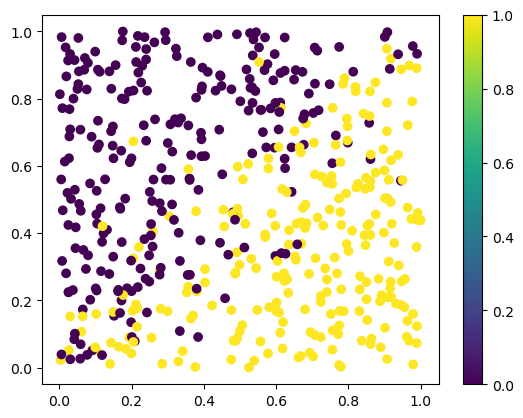

In [2]:
#리스트7.3

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

n_data = 500 # 데이터 수
X = np.zeros((n_data, 2)) # 입력
T = np.zeros((n_data)) # 정답

for i in range(n_data):
    # x, y 좌표를 랜덤으로 설정한다
    x_rand = np.random.rand() # x 좌표
    y_rand = np.random.rand() # y 좌표
    X[i, 0] = x_rand
    X[i, 1] = y_rand
    
    
    # x가 y보다 큰 영역에서는 정답 라벨을 1로 한다.
    # 경계는 정규분포를 사용해서 조금 불명료하게
    if x_rand > y_rand + 0.2*np.random.randn():
        T[i] = 1

plt.scatter(X[:, 0], X[:, 1], c=T) # 정답 라벨을 색으로 나타낸다
plt.colorbar()
plt.show()

데이터는 정답 라벨에 의해 0과 1의 그룹으로 나뉘어 있습니다. 위 코드의 산포도에는 명확하게 어딘가의 그룹에 속하는 영역과 라벨이 뒤섞인 영역이 있습니다.

### 로지스틱 회귀의 구현

아래의 코드로 로지스틱 회귀를 구현합니다. 최급강하법으로 교차 엔트로피 오차가 작아지게 각 계수를 조정합니다. 결과로서 얻어진 확률의 분포, 오차의 추이를 그래프로 표시합니다.

--- 확률 분포 ---


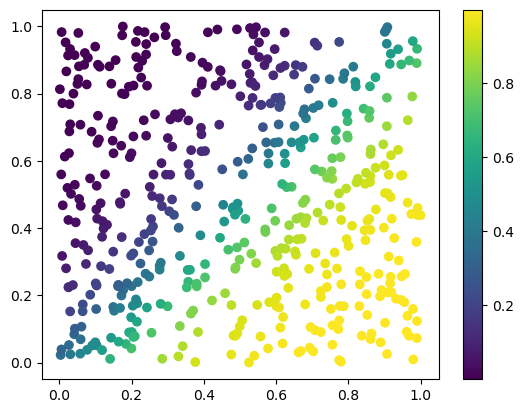

--- 오차의 추이 ---


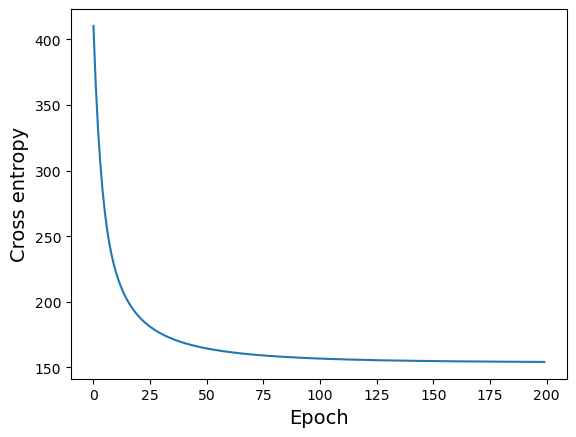

In [3]:
#리스트7.4

eta = 0.01 # 학습계수

# --- 출력을 계산(분류를 시행한다) ---
def classify(x, a_params, b_param):
    u = np.dot(x, a_params) + b_param # (식4)
    return 1/(1+np.exp(-u)) # (식4)

# --- 교차 엔트로피 오차 ---
def cross_entropy(Y, T):
    delta = 1e-7 # 미소한 값
    return -np.sum(T*np.log(Y+delta) + (1-T)*np.log(1-Y+delta)) # (식3)

# --- 각 파라미터의 기울기 ---
def grad_a_params(X, T, a_params, b_param): # a1, a2, ...의 기울기
    grad_a = np.zeros(len(a_params))
    for i in range(len(a_params)):
        for j in range(len(X)):
            grad_a[i] += ( classify(X[j], a_params, b_param) - T[j] ) * X[j, i] # (식7)
    return grad_a

def grad_b_param(X, T, a_params, b_param): # b의 기울기
    grad_b = 0
    for i in range(len(X)):
        grad_b += ( classify(X[i], a_params, b_param) - T[i] ) # (식8)
    return grad_b

# --- 학습 ---
error_x = [] # 오차 기록용
error_y = [] # 오차 기록용
def fit(X, T, dim, epoch): # dim: 입력의 차원 epoch: 반복하는 횟수
    
    # --- 파라미터의 초깃값을 설정 ---
    a_params = np.random.randn(dim)
    b_param = np.random.randn()
    
    # --- 파라미터 갱신 ---
    for i in range(epoch):
        grad_a = grad_a_params(X, T, a_params, b_param)
        grad_b = grad_b_param(X, T, a_params, b_param)
        a_params -= eta * grad_a # (식2)
        b_param -= eta * grad_b # (식2)
        
        Y = classify(X, a_params, b_param)
        error_x.append(i) # 오차의 기록
        error_y.append(cross_entropy(Y, T)) # 오차의 기록
        
    return (a_params, b_param)

# --- 확률분포의 표시 ---
a_params, b_param = fit(X, T, 2, 200) # 학습
Y = classify(X, a_params, b_param) # 학습 후의 파라미터를 사용한 분류

result_x = [] # x좌표
result_y = [] # y좌표
result_z = [] # 확률
for i in range(len(Y)):
    result_x.append(X[i, 0])
    result_y.append(X[i, 1])
    result_z.append(Y[i])
    
print("--- 확률 분포 ---")
plt.scatter(result_x, result_y, c=result_z) # 확률을 색으로 표시
plt.colorbar()
plt.show()

# --- 오차의 추이 ---
print("--- 오차의 추이 ---")
plt.plot(error_x, error_y)
plt.xlabel("Epoch", size=14)
plt.ylabel("Cross entropy", size=14)
plt.show()

위의 코드를 실행한 결과, 확률 분포와 오차의 추이가 그래프로 표시됐습니다.  

로지스틱 회귀에서는 출력을 확률로 해석할 수 있으므로, 색은 정답 라벨1로 분류될 확률이라고 생각할 수 있습니다. 원본 데이터처럼 왼쪽 위의 영역과 오른쪽 아래의 영역에서의 확률은 일정하지만 원본 데이터에서 0과 1의 라벨이 뒤섞인 경계 영역에서는 확률은 0과 1의 중간값을 취하고 있습니다.  

이처럼 로지스틱회귀 모델을 학습시킴으로써 데이터의 경향을 확률 분포로서 파악할 수 있습니다. 결과를 두 값으로 분류할 때는 0.5를 경계로서 출력이 작은 영역과 큰 영역 두 가지로 분류합니다.  

또한, 학습의 추이 그래프로부터는 학습이 진행 파라미터가 최적화 됨과 동시에 교차 엔트로피 오차가 저하하는 모습을 확인할 수 있습니다. 오차의 저하는 점차 완만하게 됩니다. 이 경우에서는 정답 라벨이 뒤섞
인 영역이 넓기 때문에 오차는 그다지 0에 가까워지지 않습니다.

## 7.3 뉴럴 네트워크의 개요

이 장에서는 수많은 기계학습 알고리즘 중에도 최근 특히 주목을 끌고 있는 뉴럴 네트워크에 대해서 설명합니다. 의사적인 신경세포를 프로그래밍으로 재현하고, 이것을 여러 개 모음으로써 고도의 표현력을 지닌 네트워크를 구축할 수 있습니다.

### 인공지능(AI), 기계학습, 뉴럴 네트워크

처음에 인공지능(AI), 기계학습, 뉴럴 네트워크에 대한 개념을 정리합니다.  

가장 넓은 개념은 인공지능입니다. 그리고 이 인공지능은 기계학습을 포함합니다. 또 그 기계학습 안의 한 분야가 뉴럴 네트워크입니다.  

그럼 이 중에서 인공지능에 대해서 설명합니다. 다음에 인공지능이라 불리는 것을 몇 가지 살펴봅니다.  

- **기계학습**  
컴퓨터 상의 알고리즘이 경험·학습하고, 판단을 시행합니다.
- **유전적 알고리즘**  
생물의 유전자를 모방한 컴퓨 상의 유전자가 돌연변이 및 교배를 시행합니다.
- **군지능**  
간단한 규칙에 따라 행동하는 개체의 집합체가 집단으로서 고도의 행동을 합니다.
- **엑스퍼트 시스템**  
사람 전문가의 사고를 모방함으로써 지식에 근거한 어드바이스를 할 수 있게 됩니다.
- **퍼지 제어**  
애매함을 허용함으로써 사람의 경험칙에 가까운 제어를 할 수 있습니다. 주로 가전 등에 이용됩니다.

또한, 위에 적은 것 중의 기계학습에는 다음과 같은 알고리즘이 있습니다.  


- **강화학습**  
시행착오를 통해서 어떤 환경에서 가치를 최대화하는 행동을 「에이전트」가 학습합니다.
- **결정트리**  
트리 구조를 훈련하는 것으로, 가지가 갈라져 나온 형태로 데이터를 분류합니다. 이것에 의해 데이터의 적절한 예측을 할 수 있게 됩니다.
- **서포트 벡터머신**  
초평면(평명의 확장)을 훈련하여 데이터 분류를 시행합니다.
- **K-NN(K-최근접 이웃 알고리즘)**  
최근접의 K개의 점을 이용한 다수결에 의한 분류를 실시하는 가장 간단한 기계학습 알고리즘입니다.
- **뉴럴 네트워크**  
뇌의 신경세포 네트워크로부터 착안한 모델로 최근 주목을 끌고 있는 딥러닝 기반입니다.

이상과 같이 뉴럴 네트워크는 기계학습 알고리즘입니다.

### 뉴런 모델

실제 뇌에는 약 1000억개의 신경세포가 있는데 컴퓨터 상의 뉴럴 네트워크는 이 신경세포 네트워크를 모델로 하고 있습니다.  

컴퓨터 상의 뉴럴 네트워크는 인공 뉴럴 네트워크로도 불리는데, 이후 뉴럴 네트워크라고 기술할 때는 이 인공 뉴럴 네트워크를 가리키는 것으로 합니다.  

뉴럴 네트워크에서는 뇌 속의 신경세포를 추상화합니다.


단일 뉴런에서는 여러 개의 입력에 각각 **가중치**를 곱해서 더합니다. 그리고 그것에 바이어스를 더해서 **활성화 함수**라는 함수로 처리를 합니다.  

입력에 가중치를 곱함으로써 각 입력의 영향력이 조정됩니다. 또한, 입력과 가중치의 곱의 총합에 바이어스를 더함으로써 활성화 함수에 들어가는 값이 조정되는데 바이어스는 말하자면 뉴런의 감도를 나타내는 값입니다. 그리고 활성화 함수는 입력과 가중치의 곱의 총합에 바이어스를 더한 것을 출력으로 변환합니다. 활성화 함수는 말하자면 뉴런을 흥분시키기 위한 함수입니다. 이 함수로의 입력 크기로부터 뉴런의 흥분 정도가 결정되고, 이것이 출력이 됩니다.

### 뉴럴 네트워크

뉴럴 네트워크는 단일 뉴런을 여러 개 조합해서 구축됩니다.  

뉴럴 네트워크는 여러 개의 뉴런으로 이뤄진 층을 나열해서 구성합니다. 1개의 뉴런은 인접층의 모든 뉴런과 연결되어 있는데 같은 층에서의 다른 뉴런과는 접속되지 않습니다. 어떤 뉴런의 출력은 다른 층의 뉴런으로의 입력이 됩니다. 뉴럴 네트워크 전체 입력에서 전체 출력을 향해서, 층에서 층으로 정보가 흐르게 됩니다.  

또한, 뉴럴 네트워크에는 **순전파**, **역전파** 라는 개념이 있습니다. 순전파에서는 정보가 입력에서 출력의 방향으로 흐르고, 역전파에서는 정보가 출력에서 입력으로 흐릅니다.  

순전파와 역전파는 입력, 출력 외에 정답이 있습니다. 뉴럴 네트워크에 학습을 시킬 때에는 출력이 정답에 가까워지도록 각 뉴런의 가중치와 바이어스를 조정합니다.  

순전파에서는 입력값에 근거해 출력값이 예측되며, 역전파에서는 출력과 정답 오차가 작아지도록 뉴럴 네트워크가 학습합니다. 순전파에서는 한 층씩 입력에 가까운 층에서부터 출력에 가까운 층으로 향해서 처리가 이루어지는데 역전파에서는 출력에 가까운 층에서부터 입력에 가까운 층을 향해 한 층씩 가중치와 바이어스의 갱신이 이뤄져 나갑니다. 이처럼 역전파에는 백프로퍼게이션(오차역전파법)이라는 알고리즘이 자주 이용됩니다.  

또한, 층의 수가 많은 유럴 네트워크에서의 학습을 딥러닝(심층학습)이라고 부릅니다. 기본적으로 층의 수나 층 안의 뉴런 수가 증가하면 뉴럴 네트워크의 표현력은 향상됩니다. 딥러닝은 사람의 뇌에 부분적으로 츅박하는 매우 고도의 학습을 실시할 수 있는 것이 특징입니다.  

백프로퍼게이션의 알고리즘은 조금 복잡한데 이 장에서는 이를 대폭 간략화합니다. 뉴럴 네트워크에서의 뉴런의 수를 극한까지 줄여서 단일층, 단일 뉴런으로 합니다. 그리고 단일 뉴런이라도 학습할 수 있음을 보여줍니다.

## 7.4 학습의 메커니즘

뉴럴 네트워크의 첫 걸음으로서 단일 뉴런이 학습하는 구조를 설명합니다. 여러 개의 층, 다수의 뉴런을 가진 뉴럴 네트워크의 경우보다도 구조는 아주 간단합니다.  

이 절에서 설명하는 학습의 구조는 이 절 다음에 코드로 나타냅니다.

### 단일 뉴런의 학습

보통 뉴럴 네트워크는 여러 개의 뉴런으로 이뤄진 층을 겹쳐 구성됩니다. 그러나 이 장에서는 간단하게 하기 위해 단일 뉴런을 이용하여 간단한 학습을 실시합니다.  

뉴런에는 보통 여러 개의 입력이 있는데 여기서는 입력은 하나만 합니다. 이 뉴런의 입력을 $x$ 좌표, 출력을 $y$ 좌표로서 정답에 가까워지도록 뉴런을 훈련합니다.

### 순전파 식

위에 적은 단일 뉴런에서의 순전파는 다음의 식으로 표현됩니다.  

$$ u = wx ＋ b $$
$$ y = f(u) ···(식1) $$

$x$가 입력, $y$가 출력입니다.  

$w$는 가중치라 불리는 파라미터, $b$는 바이어스라 불리는 파라미터입니다.  

이러한 파라미터의 조정에 의해 설령 단일 뉴런이라도 학습을 실시할 수 있습니다.  

입력과 가중치의 곱에 바이어스를 더라는 걸 $u$로 하고, $u$를 활성화 함수라고 불리는 함수에 넣습니다.  

위에 적은 식에서는 $f$가 활성화 함수입니다. $f$에 의해 출력 $y$를 얻을 수 있습니다.  

뉴럴 네트워크에서는 여러 활성화 함수가 사용되는데 이번은 시그모이드 함수를 활성화 함수로서 사용합니다.  

이 경우, **(식1)** 은 다음의 형태가 됩니다.  

$$ y = \frac{1}{1 ＋ exp( －(wx ＋ b) )} $$

### 오차의 정의

출력과 정답의 오차를 정의합니다. 오차를 작게 하도록 가중치와 바이어스를 조정함으로써 학습이 이뤄집니다.  

여기서는 회귀를 다루므로 오차함수에는 다음의 오차제곱합을 사용합니다.  

$$ E = \frac{1}{2} \sum_{j=1}^m (y_j － t_j )^2 $$

단일 뉴런은 출력이 하나이므로 순전파 1회당 오차는 다음의 형태로 표현됩니다.  

$$ E = \frac{1}{2} (y － t)^2 $$

$E$가 오차, $t$가 정답, $y$가 출력입니다.  

여기서 순전파 1회마다 오차를 구하는 파라미터를 갱신하는데 이러한 학습을 **온라인 학습** 이라고 합니다. 그에 반해 사용하는 모든 데이터에서 순전파를 실시, 오차의 합계를 이용해서 파라미터를 생신하는 학습을 **배치합습** 이라고 합니다.  

또한, 이번은 회귀이므로 오차제곱합을 사용했으나 분류의 경우는 교차 엔트로피 오차가 자주 이용됩니다.

### 정답 데이터의 준비

여기에서는 단일 뉴런 모델에 **sin()** 함수의 곡선을 학습시킵니다. 그러나 뉴런이 하나이므로 곡선의 일부밖에 학습할 수 없습니다. 여기서는 $－\frac{\pi}{2}$에서 $\frac{\pi}{2}$까지의 범위의 곡선을 사용합니다. 시그모이드 함수는 0부터 1까지의 값 밖에 출력할 수 없으므로 이 범위에 들어가도록 정답의 값을 조정합니다. 

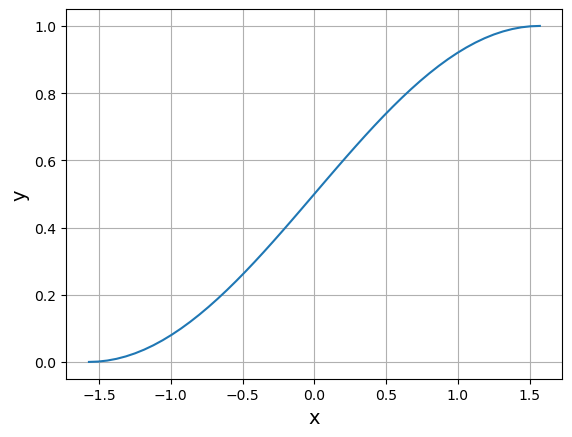

In [3]:
#리스트7.5
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# -- 입력과 정답의 준비 --
X = np.linspace(-np.pi/2, np.pi/2) # 입력: -𝜋/2 부터 𝜋/2의 범위
T = (np.sin(X) + 1)/2 # 정답: 0부터 1의 범위
n_data = len(T) # 데이터 수

# --- 그래프로 그려본다 ---
plt.plot(X, T)

plt.xlabel("x", size=14)
plt.ylabel("y", size=14)
plt.grid()

plt.show()

학습할 때는 출력이 이 곡선에 가까워지도록 가중치와 바이어스의 조정을 실시합니다. 또 복잡한 곡선을 학습할 때는 뉴런 수나 층의 수를 늘려야 합니다.

### 가중치와 바이어스의 갱신

다음의 최급강하법의 식을 시용해서 가중치와 바이어스를 갱신합니다.  

$$ w \leftarrow w － \eta \frac{\partial E}{\partial w} $$
$$ b \leftarrow \ b － \eta\frac{\partial E}{\partial b} ···(식2)$$

$\frac{\partial E}{\partial W}$는 가중치의 기울기,$\frac{\partial E}{\partial W}$는 바이어스의 기울기입니다. 위에 적은 식에 가중치와 바이어스의 갱신을 하기 위해서는 이러한 기울기를 구해야 합니다.  

여기서는 **확률적 경사하강법** (stochastic gradient descent, SGD)을 채용합니다. 확률적 경사하강법으로는 랜덤으로 샘플을 꺼내서 위에 적은 식에 의해 파라미터를 갱신합니다.

### 가중치의 기울기

가중치와 바이어스의 기울기를 각각을 구합니다. 먼저 가중치의 기울기, 즉, $\frac{\partial E}{\partial w}$를 구합니다.  

가중치의 기울기는 미분을 설명하는 장에서 설명한 연쇄율을 이용하여 다음과 같이 전개할 수 있습니다.  

$$ \frac{\partial E}{\partial w} = \frac{\partial E}{\partial u} \frac{\partial u}{\partial w} ··· (식3) $$

여기에서는 이전에 **(식1)** 에서 사용한 $u$를 사용합니다.  

여기에서 우변의 $\frac{\partial u}{\partial w}$ 부분은 다음과 같이 나타낼 수 있습니다.

$$ \frac{\partial u}{\partial w} = \frac{\partial(wx ＋ b)}{\partial w} ···(식4) $$
$$ = x $$

**(식3)** 의 우변의 $\frac{\partial E}{\partial u}$ 부분은 출력 $y$를 이용한 연쇄율에 의해 다음과 같이 나타낼 수 있습니다.

$$ \frac{\partial E}{\partial u} = \frac{\partial E}{\partial y} \frac{\partial y}{\partial u} $$

즉, 오차를 출력으로 편미분한 것과 출력을 $u$로 편미분한 것의 곱입니다.  

전자는 다음과 같이 오차를 편미분함으로써 구할 수 있습니다.

$$ \frac{\partial E}{\partial y} = \frac{\partial}{\partial y}(\frac{1}{2}(y － t)^2) = y － t $$

후자는 활성화 함수를 편미분함으로써 구할 수 있습니다. 활성화 함수에는 시그모이드 함수를 사용하는데 시그모이드 함수 $f(x)$의 도함수는

$$ f'(x) = (1 － f(x))f(x) $$

입니다. 따라서, $\frac{\partial y}{\partial u}$는 다음과 같습니다.

$$ \frac{\partial y}{\partial u} = (1 － y)y $$

여기에서 다음과 같이 $\delta$를 설정해 둡니다.

$$ \delta = \frac{\partial E}{\partial u} = \frac{\partial E}{\partial y} \frac{\partial y}{\partial u} = (y － t)(1 － y)y ··· (식5) $$

이 $\delta$는 바이어스의 기울기를 구할 때에도 사용합니다.  

**(식4)** 와 **(식5)** 에 의해 **(식3)** 은 다음의 형태가 됩니다.  

$$ \frac{\partial E}{\partial w} = x\delta $$

가중치의 기울기 $\frac{\partial E}{\partial w}$를 $x$와 $\delta$의 곱으로서 나타낼 수 있었습니다.

### 바이어스 기울기

바이어스의 기울기도 마탄가지로 구할 수 있습니다.  

바이어스의 경우 연쇄율에 의해 다음의 관계가 성립됩니다.  

$$ \frac{\partial E}{\partial b}  = \frac{\partial E}{\partial u} \frac{\partial u}{\partial b} ···(식6) $$

이 때, 우변의 $\frac{\partial u}{\partial b}$ 부분은 다음과 같습니다.  

$$ \frac{\partial u}{\partial b} = \frac{\partial (wx ＋ b)}{\partial b} $$
$$ = 1 $$

**(식6)** 에서의 $\frac{\partial E}{\partial u}$ 부분은 가중치의 기울기인 경우와 다르지 않으므로 마찬가지로 $\delta$로 합니다.  

이상을 바탕으로 **(식6)** 은 다음의 형태가 됩니다.

$$ \frac{\partial E}{\partial b} = \delta $$

이처럼 바이어스의 기울기는 $\delta$와 같아집니다.  

이상으로부터 가중치와 바이어스의 기울기를 각각 $\delta$를 이용한 간단한 식으로 나타낼 수 있었습니다. 이것들과 **(식2)** 를 사용해서 가중치와 바이어스를 갱신함으로써 학습이 이뤄집니다.

## 7.5 단일 뉴런에 의한 학습의 구현

이전 절에서 도출한 식을 이용해서 학습하는 단일 뉴런의 코드를 구현합니다.

### 베이스의 수식

이전 절에서 설명한 다음의 수식을 베이스로 코드를 기술합니다.
- $x$ : 입력, $y$ : 출력, $f$ : 활성화 함수, $w$ : 가중치, $b$ : 바이어스, $\eta$ : 학습 계수, $E$ : 오차, $t$ : 정답

$$ u = xw ＋ b ···(식1) $$
$$ \\ $$
$$ y = f(u) ···(식2) $$
$$ \\ $$
$$ w \leftarrow w － \eta \frac{\partial E}{\partial w} ···(식3) $$
$$ \\ $$
$$ b \leftarrow b － \eta \frac{\partial E}{\partial b} ···(식4) $$
$$ \\ $$
$$ \delta = (y － t)(1 － y)y ··· (식5) $$
$$ \\ $$
$$ \frac{\partial E}{\partial w} = x \delta ···(식6) $$
$$ \\ $$
$$ \frac{\partial E}{\partial b} = \delta ···(식7) $$

### 입력과 정답

학습에 이용하는 입력과 정답을 준비합니다. 이전 절에서 설명한대로 사인 커브의 일부를 정답 데이터로서 사용합니다.

In [8]:
#리스트7.6

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-np.pi/2, np.pi/2) # 입력
T = (np.sin(X) + 1)/2 # 정답
n_data = len(T) # 데이터의 수

### 순전파와 역전파

순전파와 역전파를 함수로서 구현합니다. 함수 내에서는 각 수식을 차례대로 구현합니다.

In [15]:
#리스트7.7

# --- 순전파 ---
def forward(x, w, b):
    u = x*w + b # (식1)
    y = 1/(1+np.exp(-u)) # (식2)
    return y

# --- 역전파 ---
def backward(x, y, t):
    delta = (y - t)*(1 - y)*y # (식5)
    grad_w = x * delta # (식6) 가중치의 기울기
    grad_b = delta # (식7) 바이어스의 기울기
    return (grad_w, grad_b)

### 출력의 표시

출력 또는 정답을 그래프로서 표시하는 함수를 구현합니다. 그래프 아래에는 에포크 수치와 오차제곱합을 표시합니다.

In [10]:
#리스트7.8

def show_output(X, Y, T, epoch):
    plt.plot(X, T, linestyle="dashed") # 정답을 점선으로
    plt.scatter(X, Y, marker="+") # 출력을 산포도로
    
    plt.xlabel("x", size=14)
    plt.ylabel("y", size=14)
    plt.grid()
    plt.show()
    
    print("Epoch:", epoch)
    print("Error:", 1/2*np.sum((Y-T)**2)) # 오차제곱합을 표시

### 학습

확률적 경사하강법을 사용해서 단일 뉴런을 학습시킵니다. 데이터로부터 랜덤으로 샘플을 꺼내, 순전파, 역전파, 파라미터의 갱신을 반복합니다.  

학습 도중 경과 및 결과는 그래프로서 표시합니다.

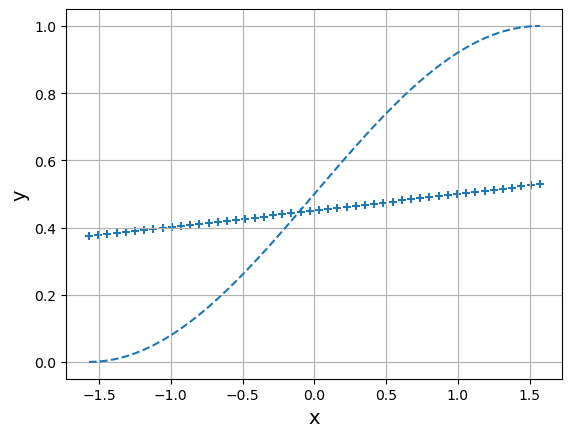

Epoch: 0
Error: 2.4930145826202508


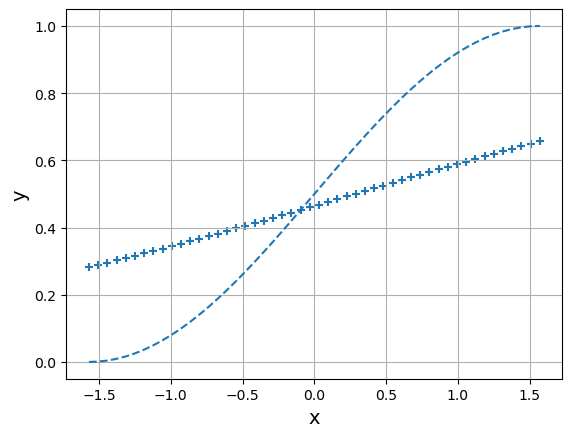

Epoch: 1
Error: 1.5388511776993967


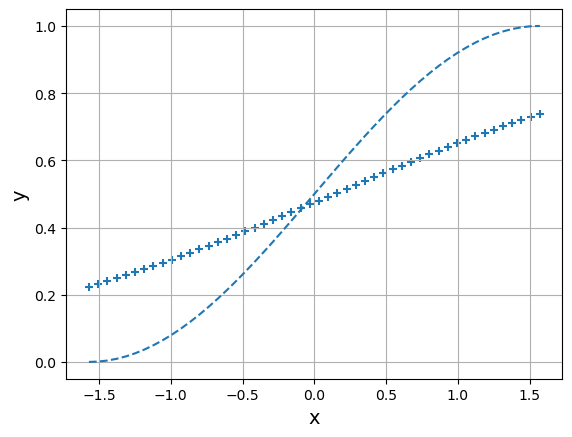

Epoch: 2
Error: 1.0232091298520767


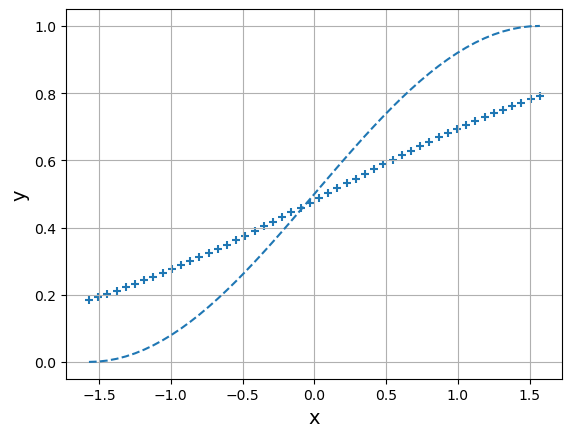

Epoch: 3
Error: 0.728937294652903


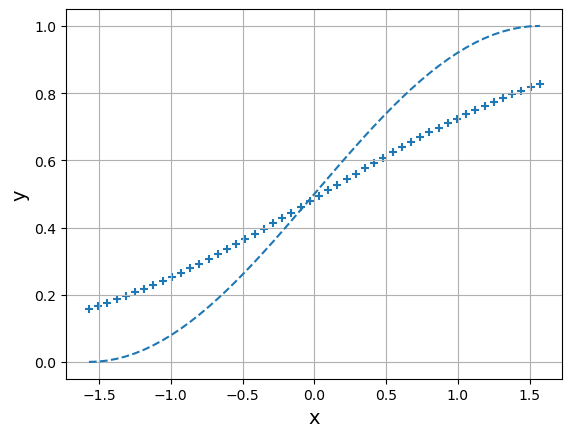

Epoch: 4
Error: 0.5460480215073199


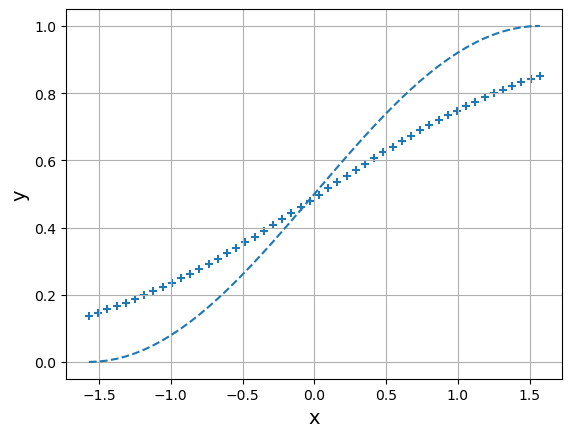

Epoch: 5
Error: 0.4254976212551435


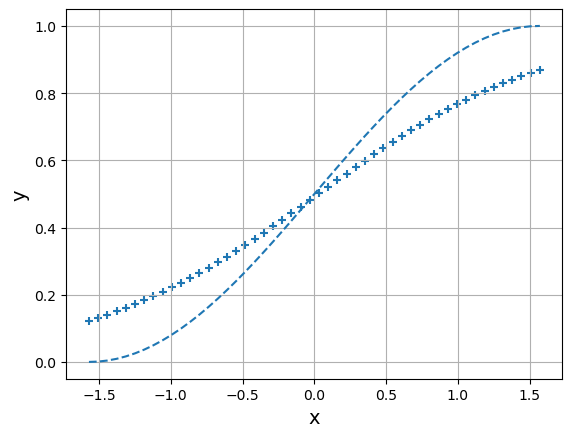

Epoch: 6
Error: 0.341356564297483


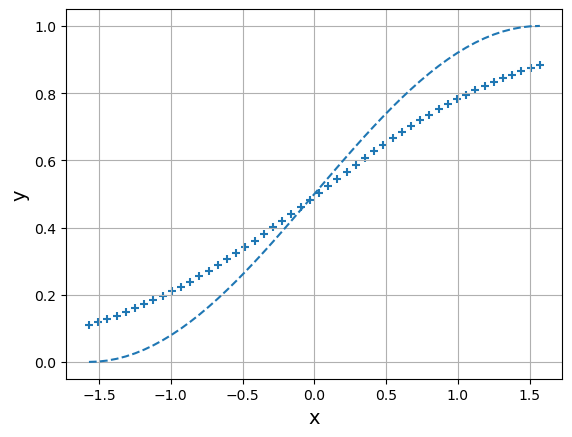

Epoch: 7
Error: 0.2801264249203582


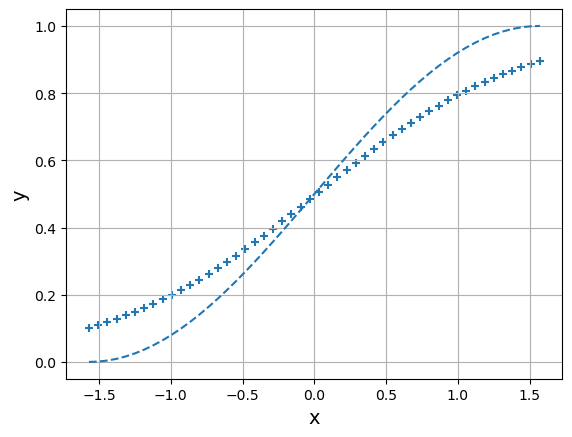

Epoch: 8
Error: 0.23402865302133946


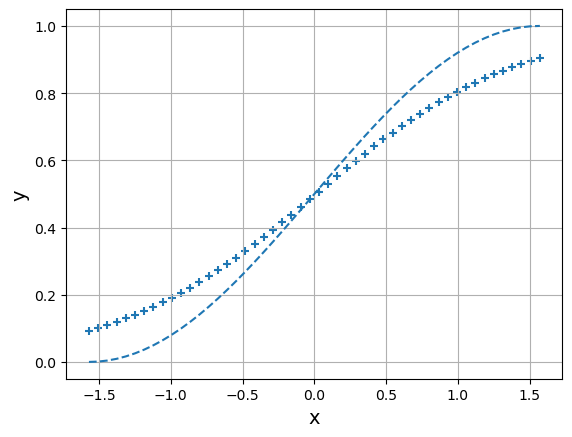

Epoch: 9
Error: 0.19849547461499767


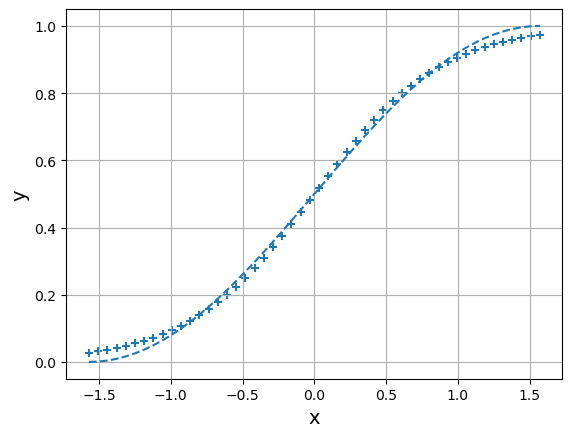

Epoch: 100
Error: 0.009605667163292449


In [18]:
#리스트7.9

# --- 고정값 ---
eta = 0.1 # 학습계수
epoch = 100 # 에포크 수

# --- 초깃값 ---
w = 0.2 # 가중치
b = -0.2 # 바이어스

# --- 학습 ---
for i in range(epoch):
    
    if i < 10: # 경과를 최초의 10 에포크만큼 표시
        Y = forward(X, w, b)
        show_output(X, Y, T, i)
        
    idx_rand = np.arange(n_data) # 0부터 n_data-1까지의 정수
    np.random.shuffle(idx_rand) # 섞는다
    
    for j in idx_rand: # 랜덤인 샘플
        
        x = X[j] # 입력
        t = T[j] # 정답
        
        y = forward(x, w, b) # 순전파
        grad_w, grad_b, = backward(x, y, t) # 역전파
        w -= eta * grad_w # (식3) 가중치의 갱신
        b -= eta * grad_b # (식4) 바이어스의 갱신
        
# --- 마지막에 결과를 표시 ---
Y = forward(X, w, b)
show_output(X, Y, T, epoch)

위의 그림에서는 점선이 정답이고 마커가 출력인데, 출력의 곡선이 점차 정답의 곡선에 가까워지며, 단일 뉴런인 사인 커브를 학습하고 있는 걸 알 수 있습니다. 마커 나열이 점선에 가까워지면서 오차는 작아지고 있습니다.  

설령 입력이 1개밖에 없는 단일의 뉴런이라 하더라도 학습 능력을 가지고 있다는 걸 알았습니다. 뉴런을 여러 개 모아서 층으로 하고, 거기에 층을 여러 개 겹침으로써 뉴럴 네트워크는 이번 예보다도 훨씬 고도의 학습 능력을 발휘하게 됩니다.